In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# utility functions to get Cityscapes Pytorch dataset and dataloaders
from pipeline.utils import get_cs_datasets
from pipeline.utils import *

data= get_cs_datasets(rootDir='pipeline/data')
sample_image, sample_label = data[0]
print(f"Input shape = {sample_image.shape}, output label shape = {sample_label.shape}")

Input shape = (512, 1024, 3), output label shape = torch.Size([512, 1024])


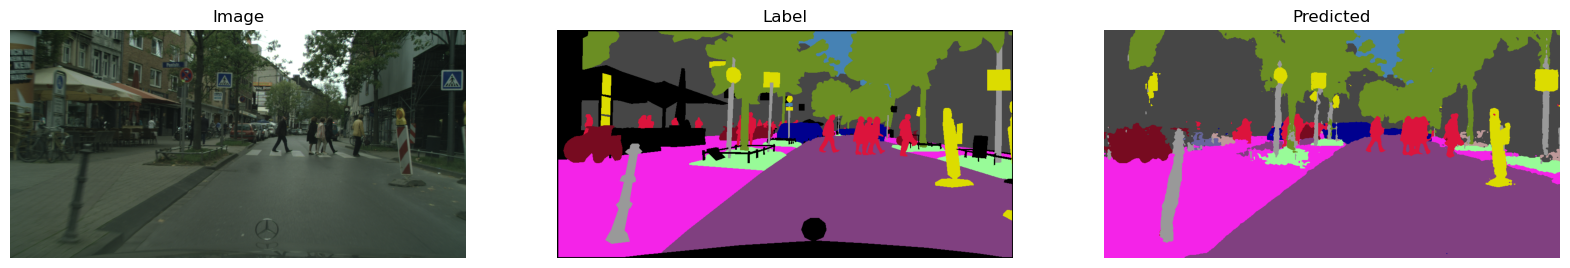

In [20]:
from pipeline.utils import train_id_to_color as cs_train_id_to_color

rgb_image, label = data[1]
output= cv2.imread("pipeline/data/predicted/aachen_000048_000019.png")
output=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
label = label.cpu().detach().numpy()

# plot sample image
fig, axes = plt.subplots(1,3, figsize=(20,10))
axes[0].imshow(rgb_image);
axes[0].set_title("Image");
axes[0].axis('off');
axes[1].imshow(cs_train_id_to_color[label]);
axes[1].set_title("Label");
axes[1].axis('off');
axes[2].imshow(output);
axes[2].set_title("Predicted");
axes[2].axis('off');

{(128, 64, 128): 0, (244, 35, 232): 1, (70, 70, 70): 2, (102, 102, 156): 3, (190, 153, 153): 4, (153, 153, 153): 5, (250, 170, 30): 6, (220, 220, 0): 7, (107, 142, 35): 8, (152, 251, 152): 9, (70, 130, 180): 10, (220, 20, 60): 11, (255, 0, 0): 12, (0, 0, 142): 13, (0, 0, 70): 14, (0, 60, 100): 15, (0, 80, 100): 16, (0, 0, 230): 17, (119, 11, 32): 18, (0, 0, 0): 19}
{(128, 64, 128): 0, (244, 35, 232): 1, (70, 70, 70): 2, (102, 102, 156): 3, (190, 153, 153): 4, (153, 153, 153): 5, (250, 170, 30): 6, (220, 220, 0): 7, (107, 142, 35): 8, (152, 251, 152): 9, (70, 130, 180): 10, (220, 20, 60): 11, (255, 0, 0): 12, (0, 0, 142): 13, (0, 0, 70): 14, (0, 60, 100): 15, (0, 80, 100): 16, (0, 0, 230): 17, (119, 11, 32): 18, (0, 0, 0): 19}
True
[[2 2 2 ... 8 8 8]
 [2 2 2 ... 8 8 8]
 [2 2 2 ... 8 8 8]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[[ 70  70  70]
  [ 70  70  70]
  [ 70  70  70]
  ...
  [107 142  35]
  [107 142  35]
  [107 142  35]]

 [[ 70  70  70]
  [ 70  70  70]
  [

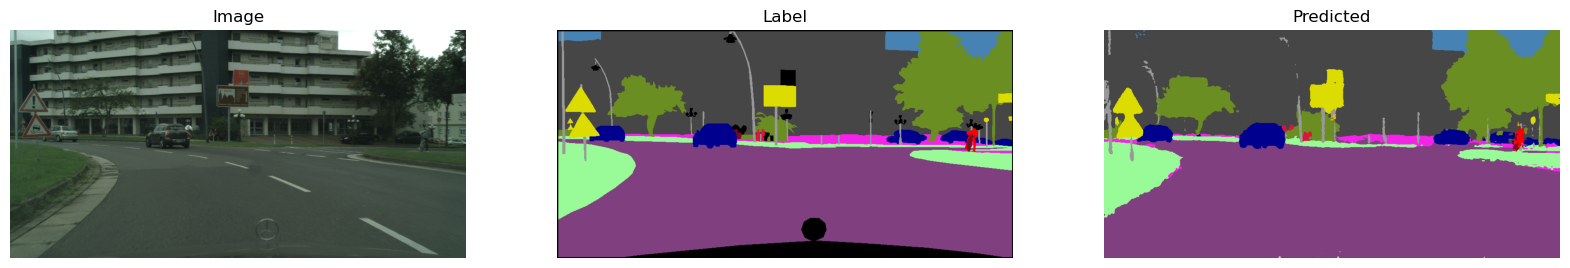

In [22]:
rgb_image, label = data[0]
output= cv2.imread("pipeline/data/predicted/aachen_000000_000019.png")
output=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

label = label.cpu().detach().numpy()
output_pred=color_to_label_image(output,train_id_to_color=cs_train_id_to_color)
label_pred= color_to_label_image(cs_train_id_to_color[label],cs_train_id_to_color)
print(np.all(label==label_pred))
# plot sample image
fig, axes = plt.subplots(1,3, figsize=(20,10))
axes[0].imshow(rgb_image);
axes[0].set_title("Image");
axes[0].axis('off');
axes[1].imshow(cs_train_id_to_color[label]);
axes[1].set_title("Label");
axes[1].axis('off');
axes[2].imshow(output);
axes[2].set_title("Predicted");
axes[2].axis('off');

[[19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]
 ...
 [19 19 19 ...  0 19 19]
 [19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]]


{(128, 64, 128): 0, (244, 35, 232): 1, (70, 70, 70): 2, (102, 102, 156): 3, (190, 153, 153): 4, (153, 153, 153): 5, (250, 170, 30): 6, (220, 220, 0): 7, (107, 142, 35): 8, (152, 251, 152): 9, (70, 130, 180): 10, (220, 20, 60): 11, (255, 0, 0): 12, (0, 0, 142): 13, (0, 0, 70): 14, (0, 60, 100): 15, (0, 80, 100): 16, (0, 0, 230): 17, (119, 11, 32): 18, (0, 0, 0): 19}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)